# Project - Deep Learning with CIFAR-10


# Abstract:
   In this article, we will be implementing a Deep Learning Model using CIFAR-10 dataset. The dataset is commonly used in Deep Learning for testing models of Image Classification. It has 60,000 color images comprising of 10 different classes. The image size is 32x32 and the dataset has 50,000 training images and 10,000 test images.

#### Import the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

##### Import keras and load cifar10 dataset

In [2]:
import keras as ke
from keras.datasets import cifar10

#### Data preprocessing:

In [3]:
# Distribute it to train and test set
(x_train,y_train),(x_test,y_test) =cifar10.load_data()

#### Understanding the original labels
The label data is  a list of 10,000 numbers ranging from 0 to 9, which corresponds to each of the 10 classes in CIFAR-10.
1.airplane : 0   2.automobile : 1   3.bird : 2   4.cat : 3  5.deer : 4   6.dog : 5 7.frog : 6
8.horse : 7      9.ship : 8         10.truck : 9

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
#Normalization:
x_train, x_test = x_train / 255.0, x_test / 255.0

###### we have 50000 training images and 10000 test images as specified above and all the images are of 32 by 32 size and have 3 color channels i.e. images are color images.

In [6]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

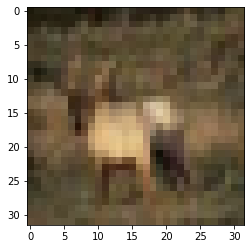

In [7]:
plt.imshow(x_train[3])

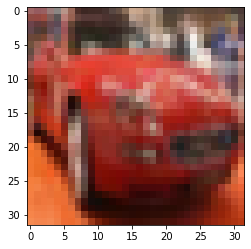

In [8]:
plt.imshow(x_train[5])

#### Visualization 
   We can do the visualization using the subplot() function from matplotlib and looping over the first 25 images from our training dataset portion.

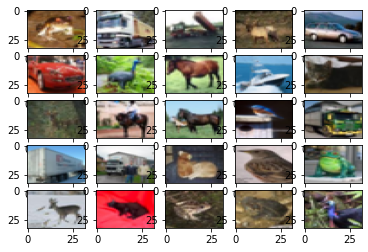

In [9]:
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
plt.show()

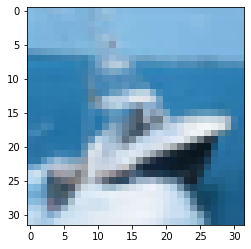

In [10]:
import tensorflow as tf
 
plt.imshow(tf.squeeze(x_train[8]))




#### Import Libraries from tensorflow and keras

In [11]:
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

#### Converting input into numeric 

In [12]:
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

### Model Building: CNN
   To create a Neural Network model, there are two generally used APIs: Sequential API and Functional API. Sequential API allows us to create a model layer wise and add it to the sequential Class.

In [13]:
from keras.models import Sequential

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
y_train.shape

(50000, 10)

In [16]:
model = Sequential()

## Hidden Layer:

### Conv2D
The most common used layer  is Conv2D. Conv2D means convolution takes place on 2 axis. It extends the convolution to three strata, Red, Green and Blue. The other type of convolutional layer is Conv1D. Conv1D is used generally for “texts”, Conv2D is used generally for “images”.



1.Kernel-size means the dimension (height x width) of that filter.The value of the kernel size if generally an odd number e.g. 3,5,7.. etc.


2.There are two types of padding, SAME & VALID. In VALID padding, there is no padding of zeros on the boundary of the image. So that when convolution takes place, there is loss of data, as some features can not be convolved. 
In the SAME padding, there is a layer of zeros padded on all the boundary of image, so there is no loss of data.


3.Relu- Rectified Linear Unit. It is the most famous activation of deep learning. 
It is famous because it is easier to compute since the mathematical function is easier and simple than other activation functions.

In [17]:
model.add(Conv2D(64,kernel_size = 3,padding = 'same',activation = 'relu',input_shape = (32,32,3)))
#Here we have used kernel-size of 3, which means the filter size is of 3 x 3. 
#In the SAME padding, there is a layer of zeros padded on all the boundary of image, so there is no loss of data.
#Relu- Rectified Linear Unit.It is easier to compute since the mathematical function is easier and 
#simple than other activation functions.

In [18]:
model.add(Conv2D(32,kernel_size = 3,activation = 'relu'))

### Pooling:
   Pooling layer is used to reduce the size of the image along with keeping the important parameters in role. Thus it helps to reduce the computation in the model.By Max Pooling we narrow down the scope and of all the features, the most important features are only taken into account. Thus the aforementioned problem is solved. Pooling is done in two ways Average Pooling or Max Pooling. Max Pooling is generally used.

In [19]:
model.add(MaxPooling2D(pool_size = 2)) 
#Pool Size means the size of filter of which the max value will be taken.
#The pool size = 2, a pool of 2x2 will be used and the max value will become the output

### LastLayer: Flatten:
   Flattening Layer is added after the stack of convolutional layers and pooling layers. Flattening layer converts the 3d image vector into 1d. 

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(500,activation = 'relu')) 
#After flattening layer, there is a Dense layer. 
#Dense layer is a fully connected layer and feeds all output from the previous functioning to all the neurons

# Output Layer:
   In the output, the layer uses the number of units as per the number of classes in the dataset. Here we are using 10, as there are 10 units. In the output we use SOFTMAX activation as it gives the probabilities of each class.

In [22]:
model.add(Dense(10,activation = 'softmax'))

# Compile:
   1.There are two loss functions, Sparse Categorical Cross-Entropy(scce) and Categorical Cross-Entropy(cce). Sparse Categorical Cross-Entropy(scce) is used when the classes are mutually exclusive, the classes are totally distinct . Categorical Cross-Entropy is used when a label or part can have multiple classes. 
   
   
    
   2.Adam Optimizer. Adam is an abbreviation for “Adaptive Learning rate Method”. This optimizer uses the initial of the gradient to adapt to the learning rate. Adam is now used instead of the stochastic gradient descent, which is used in ML, because it can update the weights after each iteration

In [23]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               3600500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5010      
Total params: 3,625,766
Trainable params: 3,625,766
Non-trainable params: 0
______________________________________________

#### Model Fit:

In [24]:
history = model.fit(x_train,y_train,epochs = 10,validation_data = (x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 111s 71ms/step - loss: 1.3919 - accuracy: 0.5045 - val_loss: 1.1241 - val_accuracy: 0.5957
Epoch 2/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.9990 - accuracy: 0.6491 - val_loss: 0.9788 - val_accuracy: 0.6564
Epoch 3/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.7774 - accuracy: 0.7274 - val_loss: 0.9929 - val_accuracy: 0.6607
Epoch 4/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.5860 - accuracy: 0.7939 - val_loss: 0.9909 - val_accuracy: 0.6752
Epoch 5/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.4044 - accuracy: 0.8571 - val_loss: 1.1642 - val_accuracy: 0.6733
Epoch 6/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.2633 - accuracy: 0.9087 - val_loss: 1.3125 - val_accuracy: 0.6697
Epoch 7/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.1735 - accuracy: 0.9399 - val_loss: 1.6312 

In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### Model prediction 

In [26]:
y_pred = model.predict(x_test) # predicted labels for x_test
y_pred

array([[1.1312218e-07, 1.2014808e-08, 9.2846818e-08, ..., 3.6100777e-05,
        6.3857988e-06, 3.3490088e-09],
       [4.2437972e-07, 8.6741728e-01, 9.5510588e-16, ..., 1.8977066e-18,
        1.3258226e-01, 3.5614161e-08],
       [2.4568781e-02, 1.1504399e-01, 8.8559149e-04, ..., 3.5835445e-04,
        8.5652983e-01, 2.3579809e-03],
       ...,
       [7.3473810e-11, 2.0750530e-16, 6.4221394e-01, ..., 6.5090177e-03,
        7.9511801e-06, 3.0693240e-11],
       [5.0676726e-07, 9.2066562e-01, 3.1125992e-08, ..., 3.5132010e-07,
        1.1655233e-11, 1.5554321e-12],
       [1.1173113e-11, 1.0519787e-13, 3.5316042e-08, ..., 9.9995542e-01,
        2.2797002e-16, 1.3127211e-14]], dtype=float32)

In [27]:
y_pred[0] 

array([1.1312218e-07, 1.2014808e-08, 9.2846818e-08, 9.9915671e-01,
       2.3582241e-09, 2.6487238e-05, 7.7414361e-04, 3.6100777e-05,
       6.3857988e-06, 3.3490088e-09], dtype=float32)

In [35]:
y_pred1 = np.argmax(y_pred,axis = 1)
y_test2 = np.argmax(y_test,axis = 1)

#### Performance measures:

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test2,y_pred1)
cm

array([[615,  38, 112,  38,  23,  11,  24,  17,  72,  50],
       [ 22, 820,  18,  15,   2,   8,  11,   8,  30,  66],
       [ 49,   7, 566,  66, 106,  91,  65,  34,  11,   5],
       [ 18,  10, 100, 439, 100, 187,  79,  42,  12,  13],
       [ 16,   4,  88,  64, 670,  41,  48,  55,  10,   4],
       [ 12,   4, 101, 175,  64, 517,  36,  75,   9,   7],
       [  6,   7,  69,  64,  64,  33, 737,   9,   4,   7],
       [ 14,   4,  56,  33,  99,  46,  16, 713,   4,  15],
       [ 61,  67,  28,  26,  10,  13,  11,   6, 753,  25],
       [ 34, 136,  15,  26,  11,  10,  12,  29,  25, 702]])

In [38]:
accuracy_score(y_test2,y_pred1)

0.6532

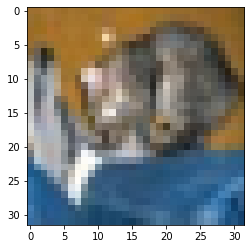

In [29]:
plt.imshow(tf.squeeze(x_test[0]))

#### Model evaluation:

In [30]:
model.evaluate(x_test,y_test,batch_size = 1)

10000/10000 [==============================] - 22s 2ms/step - loss: 2.2411 - accuracy: 0.6532


[2.2411277294158936, 0.6531999707221985]

##### Plot the training and validation curves.

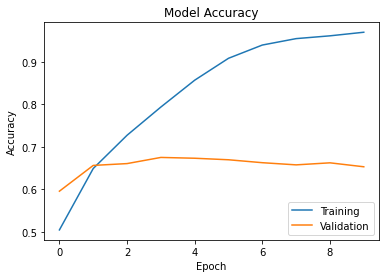

In [31]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


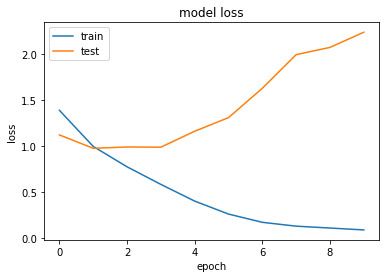

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Original label is cat and predicted label is cat


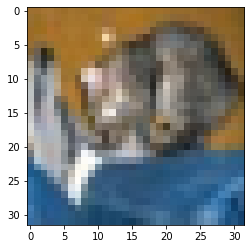

In [57]:
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()
 
# select the image from our test dataset
image_number = 0
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 32, 32, 3)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test2[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(original_label, predicted_label))
    

# Conclusion:
   Thus I classified the images from Cifar 10 dataset using Convolutional neural network.I converted all the images into matrix and fitted the model.My accuracy for the model i built is 65%.I can imporve the accuracy by increasing epochs.The images predicted by the model is 65% accurate to the acutal images.We can use this model to predict a new image with unknown label.